# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/Clubs/Data Science Team/2022-23/Copy of states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [10]:
# determine shape
df.shape

(1715, 25)

In [9]:
# count number of missing points per category
pd.isnull(df).sum(axis=0)

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [16]:
# label encode 
for i in range(2):
  # encode the category
  LE = LabelEncoder()
  newCol = LE.fit_transform(df.iloc[:, i])
  # replace the column
  df.iloc[:, i] = newColb

In [17]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,308,0,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,309,1,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,310,2,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,311,3,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,312,4,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [18]:
# use KNN imputation across the data frame
imputer = KNNImputer()
imputeMat = imputer.fit_transform(df)

# reconvert into data frame
newDF = pd.DataFrame(data=imputeMat, index=df.index, columns=df.columns)
newDF.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,308.0,0.0,1992.0,525871.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,238093.0,206918.6,731634.0,208.0,252.0,207.0,264.8
1,309.0,1.0,1992.0,139426.6,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,69712.8,38440.6,122487.0,222.0,270.2,215.8,265.0
2,310.0,2.0,1992.0,600301.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,276634.8,200733.4,673477.0,215.0,265.0,209.0,264.8
3,311.0,3.0,1992.0,337293.6,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,140425.2,141876.4,441490.0,210.0,256.0,211.0,264.8
4,312.0,4.0,1992.0,4236278.6,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,1983784.2,1156110.2,5254844.0,208.0,261.0,202.0,264.8


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Math

How many years of data are logged in our dataset? 

In [23]:
df = pd.read_csv("/content/gdrive/MyDrive/Clubs/Data Science Team/2022-23/Copy of states_edu.csv")
keys = df.loc[:, "PRIMARY_KEY"].unique()
dates = [i[:4] for i in keys]
uniqDates = np.unique(np.array(dates))
print(len(uniqDates))

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [27]:
# reverse the state category
# rows are the same
newDF.loc[:, "STATE"] = df.loc[:, "STATE"]
# same with primary key, but just the year
newDF.loc[:, "PRIMARY_KEY"] = [i[:4] for i in df.loc[:, "PRIMARY_KEY"]]

ohioMean = newDF.loc[newDF["STATE"] == "OHIO"].loc[:, "AVG_MATH_4_SCORE"].mean()
michiganMean = newDF.loc[newDF["STATE"] == "MICHIGAN"].loc[:, "AVG_MATH_4_SCORE"].mean()

# display information
if ohioMean > michiganMean:
  print("Ohio is greater")
else:
  print("Michigan is greater")

Ohio is greater


Find the average for your outcome score across all states in 2019

In [29]:
newDF.loc[newDF["PRIMARY_KEY"] == "2019"].loc[:, "AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [33]:
states = newDF.loc[:, "STATE"].unique()
maxDict = {i: newDF.loc[newDF["STATE"] == i].loc[:, "AVG_MATH_4_SCORE"].max() for i in states}
maxDict

{'ALABAMA': 243.2,
 'ALASKA': 243.2,
 'ARIZONA': 243.2,
 'ARKANSAS': 243.2,
 'CALIFORNIA': 243.2,
 'COLORADO': 247.0,
 'CONNECTICUT': 245.0,
 'DELAWARE': 243.2,
 'DISTRICT_OF_COLUMBIA': 243.2,
 'FLORIDA': 246.0,
 'GEORGIA': 243.2,
 'HAWAII': 243.2,
 'IDAHO': 243.2,
 'ILLINOIS': 243.2,
 'INDIANA': 249.0,
 'IOWA': 246.0,
 'KANSAS': 248.0,
 'KENTUCKY': 243.2,
 'LOUISIANA': 244.8,
 'MAINE': 246.0,
 'MARYLAND': 247.0,
 'MASSACHUSETTS': 253.0,
 'MICHIGAN': 244.8,
 'MINNESOTA': 253.0,
 'MISSISSIPPI': 244.8,
 'MISSOURI': 244.8,
 'MONTANA': 244.8,
 'NEBRASKA': 246.0,
 'NEVADA': 244.8,
 'NEW_HAMPSHIRE': 253.0,
 'NEW_JERSEY': 249.0,
 'NEW_MEXICO': 244.8,
 'NEW_YORK': 244.8,
 'NORTH_CAROLINA': 245.0,
 'NORTH_DAKOTA': 246.0,
 'OHIO': 246.0,
 'OKLAHOMA': 244.8,
 'OREGON': 244.8,
 'PENNSYLVANIA': 246.0,
 'RHODE_ISLAND': 244.8,
 'SOUTH_CAROLINA': 244.8,
 'SOUTH_DAKOTA': 244.8,
 'TENNESSEE': 244.8,
 'TEXAS': 244.8,
 'UTAH': 244.8,
 'VERMONT': 248.0,
 'VIRGINIA': 248.0,
 'WASHINGTON': 246.0,
 'WEST_VIRG

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [35]:
# remove the targets
targets = newDF.pop("AVG_MATH_4_SCORE")

In [36]:
newDF.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992,ALABAMA,1992.0,525871.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,55460.0,57948.0,58025.0,41167.0,238093.0,206918.6,731634.0,252.0,207.0,264.8
1,1992,ALASKA,1992.0,139426.6,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,10152.0,9748.0,8789.0,6714.0,69712.8,38440.6,122487.0,270.2,215.8,265.0
2,1992,ARIZONA,1992.0,600301.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,53497.0,55433.0,49081.0,37410.0,276634.8,200733.4,673477.0,265.0,209.0,264.8
3,1992,ARKANSAS,1992.0,337293.6,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,33511.0,34632.0,36011.0,27651.0,140425.2,141876.4,441490.0,256.0,211.0,264.8
4,1992,CALIFORNIA,1992.0,4236278.6,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,431763.0,418418.0,363296.0,270675.0,1983784.2,1156110.2,5254844.0,261.0,202.0,264.8


In [38]:
# scale the data
scaler = MinMaxScaler()
scaledMat = scaler.fit_transform(newDF.iloc[:, 2:]) # only include data categories 
scaledDF = pd.DataFrame(index = newDF.index, columns = newDF.columns[2:], data=scaledMat)

In [41]:
scaledDF.head()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0.181818,0.076959,0.024937,0.027428,0.032591,0.019222,0.025603,0.027830,0.022960,0.044599,...,0.094931,0.109179,0.110018,0.077839,0.051487,0.096687,0.104060,0.300000,0.482759,0.654545
1,0.181818,0.015258,0.006579,0.007607,0.014158,0.005543,0.005785,0.005328,0.008139,0.007488,...,0.009486,0.010578,0.010906,0.008354,0.008225,0.012454,0.008479,0.560000,0.634483,0.659091
2,0.181818,0.088843,0.031463,0.026796,0.026909,0.043463,0.034417,0.026782,0.033481,0.039197,...,0.091229,0.104034,0.092014,0.070262,0.061389,0.093594,0.094935,0.485714,0.517241,0.654545
3,0.181818,0.046850,0.014043,0.014816,0.018835,0.015312,0.014868,0.015991,0.013254,0.021491,...,0.053538,0.061483,0.065704,0.050580,0.026393,0.064168,0.058534,0.357143,0.551724,0.654545
4,0.181818,0.669377,0.290636,0.204981,0.325050,0.211150,0.314211,0.322510,0.323364,0.420276,...,0.804593,0.846581,0.724528,0.540714,0.500000,0.571245,0.813794,0.428571,0.396552,0.654545


[0.6931555756179669, 0.9003221386619781, 0.9410037284693702, 0.9630602637407212, 0.9754073857258028, 0.9824882513967238, 0.9877231058206039, 0.9911063268820831, 0.9938068199578463, 0.9955418016706046, 0.9967989012936633, 0.9978329998299674, 0.9987345985969515, 0.9991312912689178, 0.999443882690021, 0.9996534154264128, 0.9998321070301093, 0.9999028131285704, 0.9999642064110188, 0.9999869365420565, 1.0000000000000002, 1.0000000000000002]


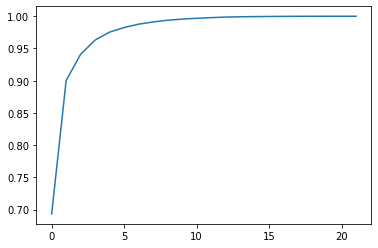

In [56]:
# PCA analysis
# make scree plot
pca = PCA(n_components=22, random_state=42)
pcaDF = pca.fit_transform(scaledDF)

# data
sum = 0
data = []
for i in pca.explained_variance_ratio_:
  sum = sum + i
  data.append(sum)

# make scree plot
print(data)
plt.plot(data)
plt.show() # plateus around PC4

In [58]:
# set up actual PCA that I'll use for the model
pca = PCA(n_components=4, random_state=42)
pcaMat = pca.fit_transform(scaledDF)
pcaMat.shape

(1715, 4)

Feature engineering justification: I'm planning on using a KNN regressor so I scaled to data to reduce bias in that. Additionally, I wanted to avoid high dimensionality in my training data so I used PCA to capture over 95% of the dataset variance while reducing the dimensionality. I removed the targets at the beginning to reduce on data leakage

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

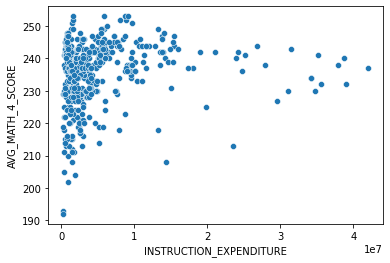

In [63]:
# math 4 score vs. instructional budget
sns.scatterplot(data=df, y="AVG_MATH_4_SCORE", x="INSTRUCTION_EXPENDITURE")
plt.show()

Average math 4 score vs. Instructional expenditure shows a positive trend, though it's not truly clear. I believe this may be due to rich small states outspending and outscoring less rich (per capita) states

**Visualization 2**

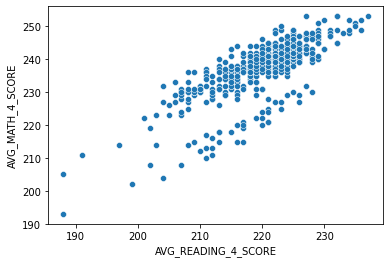

In [64]:
# math 4 score vs. reading 4 score
sns.scatterplot(data=df, y="AVG_MATH_4_SCORE", x="AVG_READING_4_SCORE")
plt.show()

Average math 4 score vs. average reading 4 score shows a very distinct positive linear trend. This is indicative that having a high reading score and having a high math score are indeed related.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = pcaMat
y = targets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [68]:
# import your sklearn class here
from sklearn.neighbors import KNeighborsRegressor

In [69]:
# create your model here
model = KNeighborsRegressor()

In [70]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [71]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

R coefficient: 0.948 
P Value: 0.0


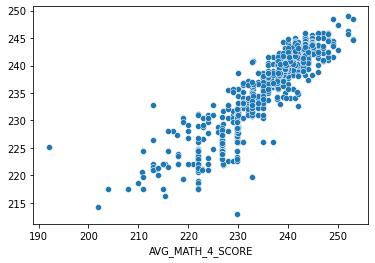

In [74]:
# Linear Correlation
r, pVal = pearsonr(y_pred, y_test)
print(f"R coefficient: {r:.3f} \nP Value: {pVal}")
sns.scatterplot(x=y_test, y=y_pred)
plt.show()

In [76]:
# RMSE
mean_squared_error(y_pred, y_test, squared=False)

2.921544194930293

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

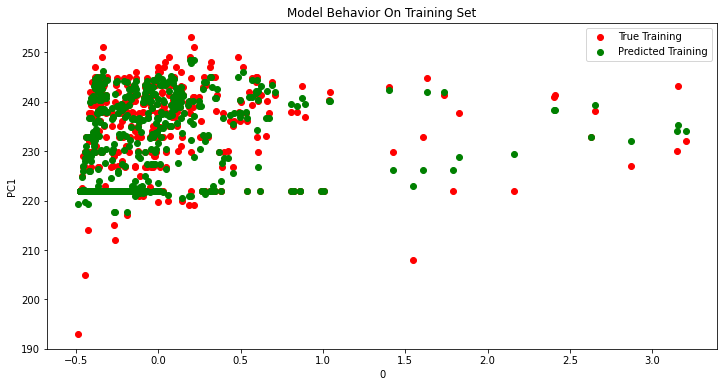

In [82]:
X_train = pd.DataFrame(X_train)
col_name = 0

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('PC1')
plt.title("Model Behavior On Training Set")

In [89]:
X_test

array([[-0.36512919, -0.04792688, -0.01950182, -0.01399829],
       [-0.28768036,  0.32742142, -0.02496048,  0.0150827 ],
       [-0.13861967,  0.34607033, -0.02243811, -0.01338783],
       ...,
       [-0.4033183 , -0.02781684, -0.04651632,  0.00300352],
       [-0.44701783,  0.37881859,  0.1652794 ,  0.08958239],
       [-0.41571705,  0.04183871, -0.05594743,  0.00352468]])

Text(0.5, 1.0, 'Model Behavior on Testing Set')

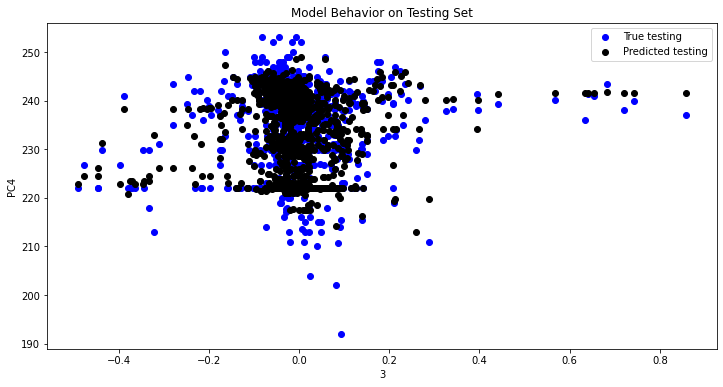

In [90]:
X_test = pd.DataFrame(X_test)
col_name = 3

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel("PC4")
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Through this notebook I have employed mathematics, statistical, and machine learning techniques to regress the score of a state for 4th grade math score. I've used imputation methods, scaling, and dimensionality reduction to create a KNN regressor with a very good accuracy. The trend is proven to be learned with an R value of .948 and and RMSE of under 3. I will say, though, there is some data leakage as the training and testing data is both imputed and normalized together. This could be inflating the accuracy of the model.

